In [1]:
from __future__ import division
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import pylab
from os import path
from datetime import datetime
from pyquaternion import Quaternion

In [2]:
# Initialization #
file_path = path.relpath("data/log_2019-08-05.csv")
file = open(file_path, "r")
y = []
x = []
dict = {}
i = 0
index = 0

In [3]:
# Parse the data out of the file #
lines = file.readlines()
for line in lines[:-1]:
    if i > 1: # Disregard header info
        lineParts = line.strip().split(",") # Split the line into each columns values
        dict[i-2] = [lineParts[1], lineParts[3], Quaternion(lineParts[4],lineParts[5],lineParts[6],lineParts[7])]
        # Create a dictionary entry w/ the sensor values -> dict[i] = [Milis, Side, Quaternion(W, X, Y, Z)]
    i += 1

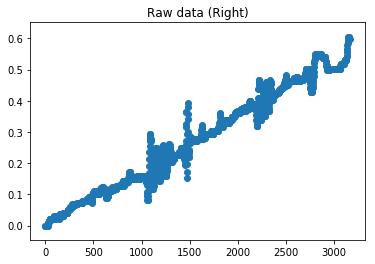

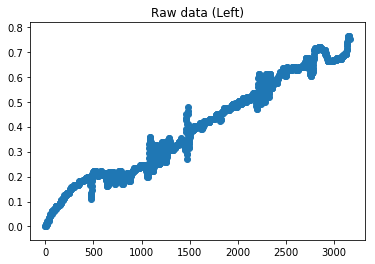

In [16]:
# Graph the distance between the quaternions #
xL = []
xR = []
yL = []
yR = []
prevQuatL = prevQuatR = currQuatL = currQuatR = None
i = 0 # keep track of our current iteration
for key, value in dict.items():
    if value[1] == "L": 
    # Left side #
        if i == 0 or i == 1: # Special case for initial values
            prevQuatL = value[2] # value[2] gives us the quaternion value
            xL.append(i)
            yL.append(0)
            i += 1
            continue

        currQuatL = value[2]
        xL.append(i)
        yL.append(Quaternion.distance(prevQuatL, currQuatL)) # Get the distance between the previous quat and the current one
        i += 1       
        continue
        
        
    # Right side #   
    if i == 0 or i == 1: # Special case for initial values
        prevQuatR = value[2] # value[2] gives us the quaternion value
        xR.append(i)
        yR.append(0)
        i += 1
        continue
    
    currQuatR = value[2]
    xR.append(i)
    yR.append(Quaternion.distance(prevQuatR, currQuatR)) # Get the distance between the previous quat and the current one
    i += 1
    
plt.scatter(xR,yR)
plt.title("Raw data (Right)")
plt.show()

plt.scatter(xL,yL)
plt.title("Raw data (Left)")
plt.show()

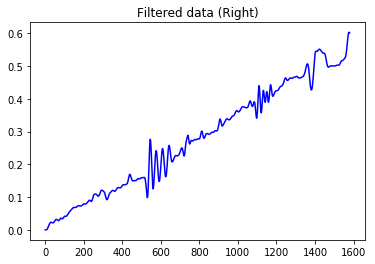

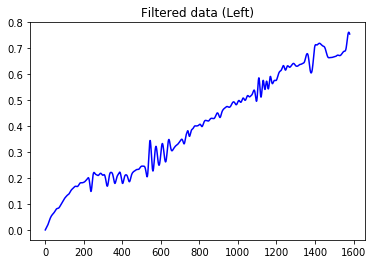

In [17]:
# Filter the data #
yR = np.asarray(yR)
yL = np.asarray(yL)
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_dataR = signal.filtfilt(B,A, yR)
smooth_dataL = signal.filtfilt(B,A, yL)

plt.plot(smooth_dataR,'b-')
plt.title("Filtered data (Right)")
plt.show()

plt.plot(smooth_dataL,'b-')
plt.title("Filtered data (Left)")
plt.show()